In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline 

In [6]:
df=pd.read_csv("Data-Collisions.csv")

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [8]:
df['LIGHTCOND'].value_counts().to_frame()

,LIGHTCOND
Daylight,116137
Dark - Street Lights On,48507
Unknown,13473
Dusk,5902
Dawn,2502
Dark - No Street Lights,1537
Dark - Street Lights Off,1199
Other,235
Dark - Unknown Lighting,11


In [9]:
df['LOCATION'].value_counts().to_frame()

,LOCATION
BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N,276
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB,271
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N,265
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,254
6TH AVE AND JAMES ST,252
...,...
UNIVERSITY VIEW PL NE BETWEEN NE 45TH PL AND 34TH AVE NE,1
34TH AVE NE AND NE 73RD ST,1
39TH AVE NE BETWEEN NE 125TH ST AND NE 127TH ST,1
WARD ST BETWEEN NOB HILL AVE N AND 4TH AVE N,1


In [17]:
# Create a new df with data of interest 
df_StreetLights=df.filter(['SEVERITYCODE','LOCATION','LIGHTCOND'], axis=1)
df_StreetLights.head()

,SEVERITYCODE,LOCATION,LIGHTCOND
0,2,5TH AVE NE AND NE 103RD ST,Daylight
1,1,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Dark - Street Lights On
2,1,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Daylight
3,1,2ND AVE BETWEEN MARION ST AND MADISON ST,Daylight
4,2,SWIFT AVE S AND SWIFT AV OFF RP,Daylight


In [19]:
df["SEVERITYCODE"].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

### As you can see, the number of rows in class 1 is almost three times bigger than the number of rows in class 2. It is possible to solve the issue by downsampling the class 1.

In [21]:
from sklearn.utils import resample

In [25]:
df_maj= df[df.SEVERITYCODE==1]
df_min= df[df.SEVERITYCODE==2]

df_maj_dsample= resample(df_maj,
                        replace=False,
                        n_samples=58188,
                        random_state=123)

balanced_df= pd.concat([df_maj_dsample,df_min])

balanced_df.SEVERITYCODE.value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

### Methodology
For implementing the solution, I have used Github as a repository and running Jupyter Notebook to preprocess data and build Machine Learning models. Regarding coding, I have used Python and its popular packages such as Pandas, NumPy and Sklearn.
Once I have load data into Pandas Dataframe, used ‘dtypes’ attribute to check the feature names and their data types. Then I have selected the most important features to predict the severity of accidents in Seattle. Among all the features, the following features have the most influence in the accuracy of the predictions:
“WEATHER”,
“ROADCOND”,
“LIGHTCOND”
Also, as I mentioned earlier, “SEVERITYCODE” is the target variable.
I have run a value count on road (‘ROADCOND’) and weather condition (‘WEATHER’) to get ideas of the different road and weather conditions. I also have run a value count on light condition (’LIGHTCOND’), to see the breakdowns of accidents occurring during the different light conditions. The results can be seen below:

In [26]:
df["WEATHER"].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [27]:
df["ROADCOND"].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [28]:
df["LIGHTCOND"].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [73]:
df.info() #Analysing data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 68 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   SEVERITYCODE                                                    194673 non-null  int64  
 1   X                                                               194673 non-null  float64
 2   Y                                                               194673 non-null  float64
 3   INCKEY                                                          194673 non-null  int64  
 4   PERSONCOUNT                                                     194673 non-null  int64  
 5   PEDCOUNT                                                        194673 non-null  int64  
 6   PEDCYLCOUNT                                                     194673 non-null  int64  
 7   VEHCOUNT                              

In [74]:
df.nunique() #Analysing number of unique values per column

SEVERITYCODE                  2
X                         23563
Y                         23839
INCKEY                   194673
PERSONCOUNT                  47
                          ...  
ADDRTYPE_Intersection         2
UNDERINFL_0                   2
UNDERINFL_1                   2
UNDERINFL_N                   2
UNDERINFL_Y                   2
Length: 68, dtype: int64

In [75]:
df.isna().sum() #Finding total number of missing values in the data.

SEVERITYCODE             0
X                        0
Y                        0
INCKEY                   0
PERSONCOUNT              0
                        ..
ADDRTYPE_Intersection    0
UNDERINFL_0              0
UNDERINFL_1              0
UNDERINFL_N              0
UNDERINFL_Y              0
Length: 68, dtype: int64

### After balancing SEVERITYCODE feature, and standardizing the input feature, the data has been ready for building machine learning models.
I have employed three machine learning models:
Logistic regression

Decision Tree
random forest
After importing necessary packages and splitting preprocessed data into test and train sets, for each machine learning model, I have built and evaluated the model and shown the results as follow:

In [58]:
import seaborn as sns #For data visualization
import numpy as np #For data processing on series

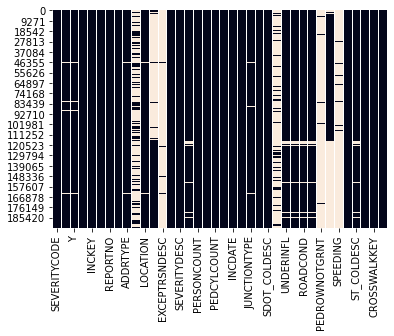

In [59]:
sns.heatmap(df.isnull(), cbar=False) #Visualizing the missing values

In [60]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [61]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
X,0.010309,1.000000,-0.160262,0.009956,0.010309,0.010300,0.120754,0.010309,0.012887,0.011304,-0.001752,-0.012168,0.010904,-0.001016,-0.001618,0.013586
Y,0.017737,-0.160262,1.000000,-0.023848,-0.027396,-0.027415,-0.114935,0.017737,-0.013850,0.010178,0.026304,0.017058,-0.019694,-0.006958,0.004618,0.009508
OBJECTID,0.020131,0.009956,-0.023848,1.000000,0.946383,0.945837,0.046929,0.020131,-0.062333,0.024604,0.034432,-0.094280,-0.037094,0.969276,0.028076,0.056046
INCKEY,0.022065,0.010309,-0.027396,0.946383,1.000000,0.999996,0.048524,0.022065,-0.061500,0.024918,0.031342,-0.107528,-0.027617,0.990571,0.019701,0.048179
COLDETKEY,0.022079,0.010300,-0.027415,0.945837,0.999996,1.000000,0.048499,0.022079,-0.061403,0.024914,0.031296,-0.107598,-0.027461,0.990571,0.019586,0.048063
INTKEY,0.006553,0.120754,-0.114935,0.046929,0.048524,0.048499,1.000000,0.006553,0.001886,-0.004784,0.000531,-0.012929,0.007114,0.032604,-0.010510,0.018420
SEVERITYCODE.1,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
PERSONCOUNT,0.130949,0.012887,-0.013850,-0.062333,-0.061500,-0.061403,0.001886,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,0.011784,-0.021383,-0.032258
PEDCOUNT,0.246338,0.011304,0.010178,0.024604,0.024918,0.024914,-0.004784,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.021461,0.001810,0.565326


In [62]:
df["ST_COLCODE"] = df["ST_COLCODE"].fillna(df["ST_COLCODE"].mode()[0])
df["UNDERINFL"] = df["UNDERINFL"].fillna(df["UNDERINFL"].mode()[0])
df["X"] = df["X"].fillna(df["X"].median())
df["Y"] = df["Y"].fillna(df["Y"].median())
df["LIGHTCOND"] = df["LIGHTCOND"].fillna(df["LIGHTCOND"].mode()[0])
df = df.drop(["SDOTCOLNUM","INTKEY","COLDETKEY","SEVERITYCODE.1","SPEEDING" ,"EXCEPTRSNDESC","PEDROWNOTGRNT","INATTENTIONIND","EXCEPTRSNCODE","LOCATION","INCDATE","INCDTTM","OBJECTID","REPORTNO","SDOT_COLDESC","ST_COLDESC","ST_COLCODE","SEVERITYDESC"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   SEVERITYCODE   194673 non-null  int64  
 1   X              194673 non-null  float64
 2   Y              194673 non-null  float64
 3   INCKEY         194673 non-null  int64  
 4   STATUS         194673 non-null  object 
 5   ADDRTYPE       192747 non-null  object 
 6   COLLISIONTYPE  189769 non-null  object 
 7   PERSONCOUNT    194673 non-null  int64  
 8   PEDCOUNT       194673 non-null  int64  
 9   PEDCYLCOUNT    194673 non-null  int64  
 10  VEHCOUNT       194673 non-null  int64  
 11  JUNCTIONTYPE   188344 non-null  object 
 12  SDOT_COLCODE   194673 non-null  int64  
 13  UNDERINFL      194673 non-null  object 
 14  WEATHER        189592 non-null  object 
 15  ROADCOND       189661 non-null  object 
 16  LIGHTCOND      194673 non-null  object 
 17  SEGLANEKEY     194673 non-nul

In [63]:
#Making a list of all categorical variables
clmn = {"STATUS","ADDRTYPE","COLLISIONTYPE","JUNCTIONTYPE","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","HITPARKEDCAR"}

In [64]:
#Converting them into dummy variables
df = pd.get_dummies(data=df,columns=clmn,prefix=clmn)

#Concatnating them to the dataframe
df.dtypes

SEVERITYCODE               int64
X                        float64
Y                        float64
INCKEY                     int64
PERSONCOUNT                int64
                          ...   
ADDRTYPE_Intersection      uint8
UNDERINFL_0                uint8
UNDERINFL_1                uint8
UNDERINFL_N                uint8
UNDERINFL_Y                uint8
Length: 68, dtype: object

In [65]:
df.shape

(194673, 68)

### Splitting data into two dataframes.

In [66]:
X = df.drop(["SEVERITYCODE"],axis=1)
y = df["SEVERITYCODE"]

### Using Logistic Regression Model

0.7272377038654168
              precision    recall  f1-score   support

           1       0.72      0.99      0.84     27394
           2       0.88      0.09      0.17     11541

    accuracy                           0.73     38935
   macro avg       0.80      0.54      0.50     38935
weighted avg       0.77      0.73      0.64     38935



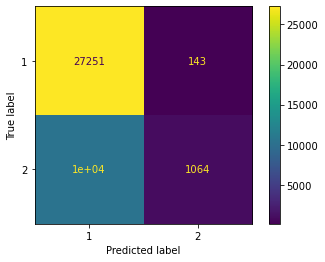

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


LR = LogisticRegression(max_iter=100000)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

LR.fit(X_train,y_train)
score = LR.score(X_test, y_test)
print(score)

#y_pred = LR.predict(X_test)


plot_confusion_matrix(LR,X_test,y_test)

y_pred = LR.predict(X_test) 
print(classification_report(y_test, y_pred))

### Using Decision Tree Classifier

0.6875818672145885
              precision    recall  f1-score   support

           1       0.78      0.77      0.78     27394
           2       0.47      0.48      0.48     11541

    accuracy                           0.69     38935
   macro avg       0.63      0.63      0.63     38935
weighted avg       0.69      0.69      0.69     38935



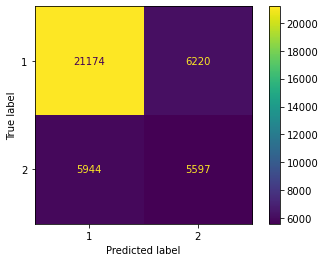

In [69]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import  cross_val_score

DT = DecisionTreeClassifier()

DT.fit(X_train,y_train)
score_1 = DT.score(X_test, y_test)
print(score_1)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(DT,X_test,y_test)

y_pred_1 = DT.predict(X_test) 

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_1))

### Using Random Forest Classifier

0.7507127263387697
              precision    recall  f1-score   support

           1       0.74      0.99      0.85     27394
           2       0.89      0.18      0.30     11541

    accuracy                           0.75     38935
   macro avg       0.82      0.59      0.57     38935
weighted avg       0.79      0.75      0.69     38935



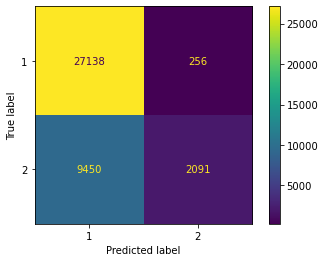

In [70]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

random_forest.fit(X_train,y_train)
score_2 = random_forest.score(X_test, y_test)
print(score_2)

plot_confusion_matrix(random_forest,X_test,y_test)


y_pred_2 = random_forest.predict(X_test) 

print(classification_report(y_test, y_pred_2))

### Using XGBoost Classifier

In [ ]:
!pip install XGBoost as xgb
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train,y_train)
score_3 = xgb.score(X_test, y_test)
print(score_3)

plot_confusion_matrix(xgb,X_test,y_test)


y_pred_3 = xgb.predict(X_test) 

print(classification_report(y_test, y_pred_3))

### Results and Evaluations
#### Conclusion
Based on the dataset provided for this capstone from weather, road, and light conditions pointing to certain classes, we can conclude that particular conditions have a somewhat impact on whether or not travel could result in property damage (class 1) or injury (class 2)